# Unbalanced Classes

In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split

X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
y_train = pd.read_csv('../data/y_train.csv')
y_test = pd.read_csv('../data/y_test.csv')
y_train.quality.value_counts().sort_index()

3      20
4     145
5    1432
6    1900
7     723
8     129
9       3
Name: quality, dtype: int64

Let's see how unbalanced these classes are:

In [108]:
class_counts = y_train.quality.value_counts().sort_index().rename_axis('unique_values').to_frame('training')
class_counts['test'] = y_test.quality.value_counts().sort_index()
class_counts

,training,test
unique_values,,
3,20,10
4,145,71
5,1432,706
6,1900,936
7,723,356
8,129,64
9,3,2


The data were split 2/3 for training and 1/3 for test. We can see that there's lots of 5's and 6's, but almost no 9's or 3's. We can rebalance the classs by resampling the data. Looking to imblearn (imbalanced learning), we use the random oversampler to balance the classes:

In [111]:
from imblearn.over_sampling import RandomOverSampler
rnd = RandomOverSampler(random_state=1)
X_train_resampled,y_train_resampled = rnd.fit_resample(X_train,y_train)

class_counts = y_train_resampled.quality.value_counts().sort_index().rename_axis('unique_values').to_frame('training')
class_counts['test'] = y_test.quality.value_counts().sort_index()
class_counts

,training,test
unique_values,,
3,1900,10
4,1900,71
5,1900,706
6,1900,936
7,1900,356
8,1900,64
9,1900,2


Let's see how well this model could work as a binary classification problem. Instead of predicting the wine quality score itself, perhaps we can look for bad wines. Let's suppose that we consider wines below some threshold score to be "bad". Perhaps we can detect bad wines with higher accuracy. Let's change the target from a multiclass to a binary by comparison with a threshold.

In [138]:
threshold = 6
y_train_bool = y_train.gt(6)
y_test_bool = y_test.gt(6)

bad_predictor = LinearRegression()
bad_predictor.fit(X_train,y_train_bool)
print(classification_report(y_test_bool, np.greater(bad_predictor.predict(X_test),0.5)))

              precision    recall  f1-score   support

       False       0.83      0.98      0.90      1723
        True       0.66      0.17      0.27       422

    accuracy                           0.82      2145
   macro avg       0.74      0.58      0.59      2145
weighted avg       0.79      0.82      0.77      2145



In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression(fit_intercept=False)
lin_reg.fit(X_train,y_train)
lin_reg_resampled = LinearRegression(fit_intercept=False)
lin_reg_resampled.fit(X_train_resampled,y_train_resampled)

from sklearn.metrics import classification_report, plot_confusion_matrix

print('Raw data classification report\n')
print(classification_report(y_test,lin_reg.predict(X_test).round()))
print(classification_report(y_test,lin_reg_resampled.predict(X_test).round()))
lin_reg_resampled.get_params()

Raw data

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00        10
         4.0       0.02      0.06      0.03        71
         5.0       0.38      0.33      0.36       706
         6.0       0.47      0.38      0.42       936
         7.0       0.23      0.21      0.22       356
         8.0       0.06      0.06      0.06        64
         9.0       0.00      0.00      0.00         2
        10.0       0.00      0.00      0.00         0
        33.0       0.00      0.00      0.00         0

    accuracy                           0.32      2145
   macro avg       0.09      0.08      0.08      2145
weighted avg       0.37      0.32      0.34      2145

              precision    recall  f1-score   support

        -1.0  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'normalize': False}

The mean squared error (MSE) increases after the model has been trained on resampled data. However, it may have better performance at the extrema. Let's rerun the 

      quality
0           6
1           7
2           4
3           5
4           7
...       ...
2140        6
2141        6
2142        6
2143        6
2144        6

[2145 rows x 1 columns]
0      -0.374404
1      -2.224523
2       0.026056
3      -0.074657
4       1.405412
          ...   
2140    1.178228
2141    0.233636
2142   -0.288270
2143   -0.045103
2144   -0.270949
Length: 2145, dtype: float64
MSE: 26515.116790951688


ValueError: x and y must be the same size

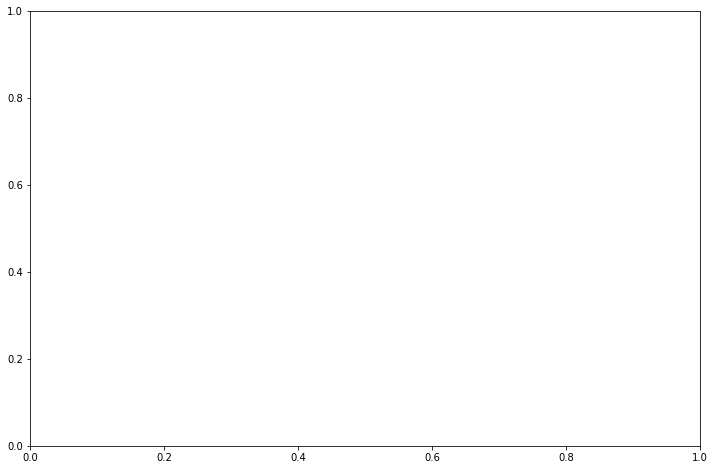

In [117]:
import numpy as np
import matplotlib.pyplot as plt

y_pred = model1.predict(X_test)

def class_scatter(test,pred):
    print('MSE:',mean_squared_error(test,pred))
    plt.figure(figsize=(12,8))
    noised_data = test.add(pd.Series(np.random.normal(size=test.size)))
    plt.scatter(noised_data,pred,alpha = 0.1)
    plt.plot(range(3,10),range(3,10))
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Quality')
    plt.show()
    
class_scatter(y_test,y_pred)

In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss

tree = DecisionTreeClassifier(min_samples_split = 5)
tree.fit(X_resampled,y_resampled)
y_pred = tree.predict(X_test)
print(tree.classes_)
print(log_loss(y_test,tree.predict_proba(X_test)))
print(mean_squared_error(y_test,y_pred))

[3 4 5 6 7 8 9]
23.012378095136597
1.9365967365967367


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        71
           5       0.31      0.43      0.36       706
           6       0.43      0.53      0.47       936
           7       0.24      0.02      0.04       356
           8       0.00      0.00      0.00        64
           9       0.00      0.00      0.00         2

    accuracy                           0.38      2145
   macro avg       0.14      0.14      0.13      2145
weighted avg       0.33      0.38      0.33      2145



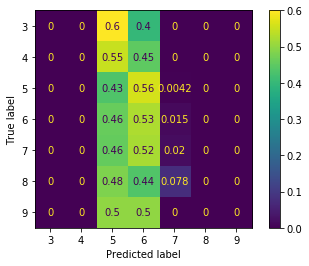

In [67]:
from sklearn.metrics import classification_report, plot_confusion_matrix
print(classification_report(y_test,y_pred))
plot_confusion_matrix(tree,X_test,y_test,labels=[3,4,5,6,7,8,9],normalize='true')
plt.show()

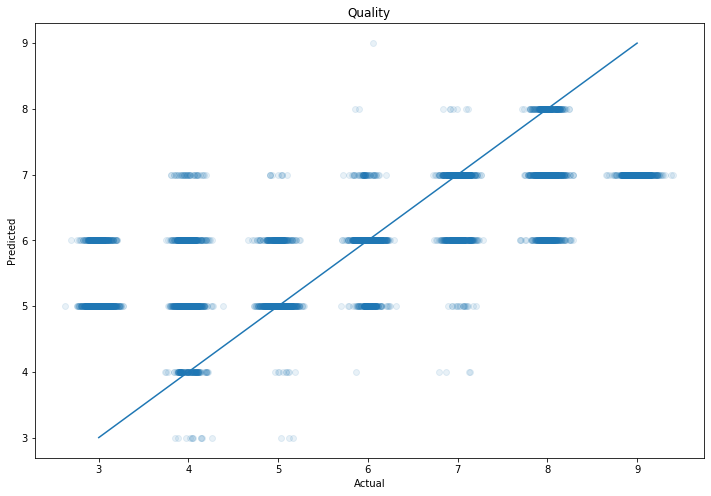

2.0388877694942575
              precision    recall  f1-score   support

           3       0.00      0.00      0.00       709
           4       0.89      0.16      0.27       709
           5       0.34      0.72      0.46       709
           6       0.33      0.74      0.46       709
           7       0.27      0.59      0.37       709
           8       0.96      0.28      0.43       709
           9       0.00      0.00      0.00       709

    accuracy                           0.35      4963
   macro avg       0.40      0.35      0.28      4963
weighted avg       0.40      0.35      0.28      4963



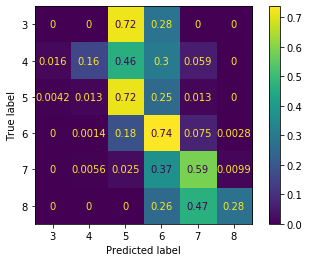

In [12]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier()
randomForest.fit(X_resampled,y_resampled)
y_pred = randomForest.predict(Xtest)
log_loss(ytest,randomForest.predict_proba(Xtest))
class_scatter(ytest,y_pred)
print(mean_squared_error(ytest,y_pred))
print(classification_report(ytest,y_pred))
plot_confusion_matrix(randomForest,Xtest,ytest,labels=[3,4,5,6,7,8],normalize='true')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           3       0.15      0.23      0.18       709
           4       0.27      0.11      0.16       709
           5       0.21      0.64      0.32       709
           6       0.29      0.02      0.04       709
           7       0.00      0.00      0.00       709
           8       0.00      0.00      0.00       709
           9       0.49      1.00      0.66       709

    accuracy                           0.29      4963
   macro avg       0.20      0.29      0.19      4963
weighted avg       0.20      0.29      0.19      4963



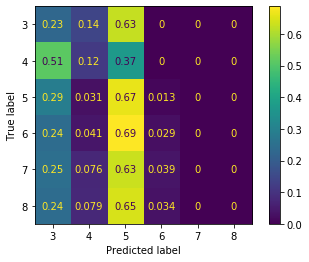

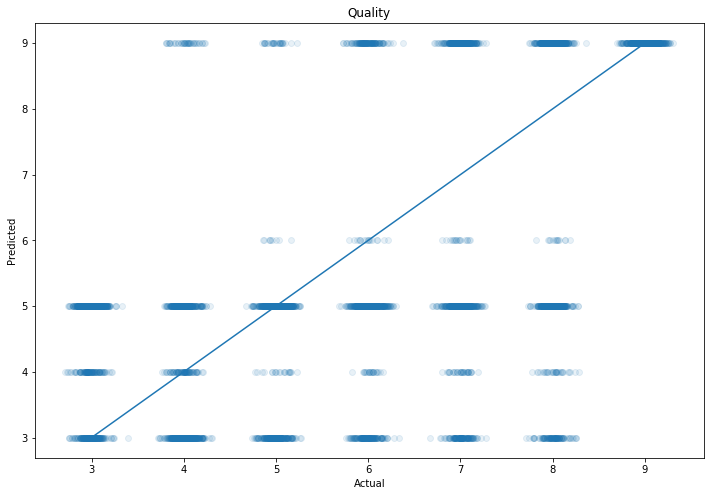

In [13]:
from sklearn.ensemble import AdaBoostClassifier

AdaModel = AdaBoostClassifier(learning_rate=1,n_estimators=100)

def check_out_model(model):
    model.fit(X_resampled,y_resampled)
    y_pred = model.predict(Xtest)
    print(classification_report(ytest,y_pred))
    plot_confusion_matrix(model,Xtest,ytest,labels=[3,4,5,6,7,8],normalize='true')
    plt.show()
    class_scatter(ytest,y_pred)
    
check_out_model(AdaModel)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00       709
           4       0.94      0.15      0.25       709
           5       0.34      0.68      0.45       709
           6       0.22      0.79      0.34       709
           7       0.59      0.51      0.55       709
           8       0.97      0.30      0.46       709
           9       0.00      0.00      0.00       709

    accuracy                           0.35      4963
   macro avg       0.44      0.35      0.29      4963
weighted avg       0.44      0.35      0.29      4963



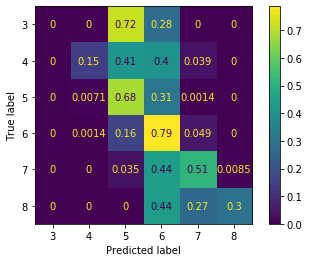

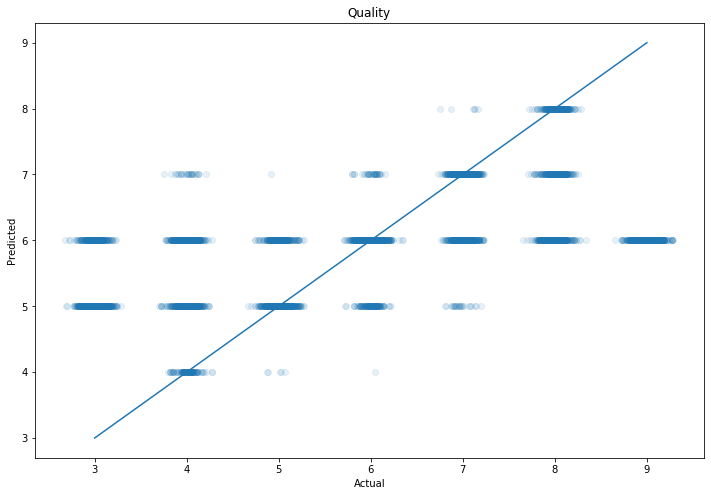

ExtraTreesClassifier()

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
check_out_model(ExtraTreesClassifier())
extraTrees = ExtraTreesClassifier()
extraTrees.fit(Xtrain,ytrain)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

           3       0.30      0.28      0.29       709
           4       0.34      0.47      0.39       709
           5       0.34      0.45      0.39       709
           6       0.42      0.08      0.13       709
           7       0.32      0.24      0.27       709
           8       0.32      0.43      0.37       709
           9       0.87      1.00      0.93       709

    accuracy                           0.42      4963
   macro avg       0.42      0.42      0.40      4963
weighted avg       0.42      0.42      0.40      4963



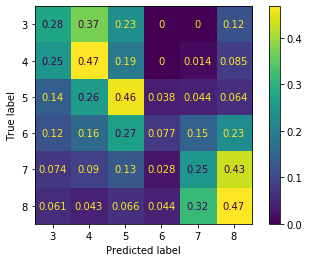

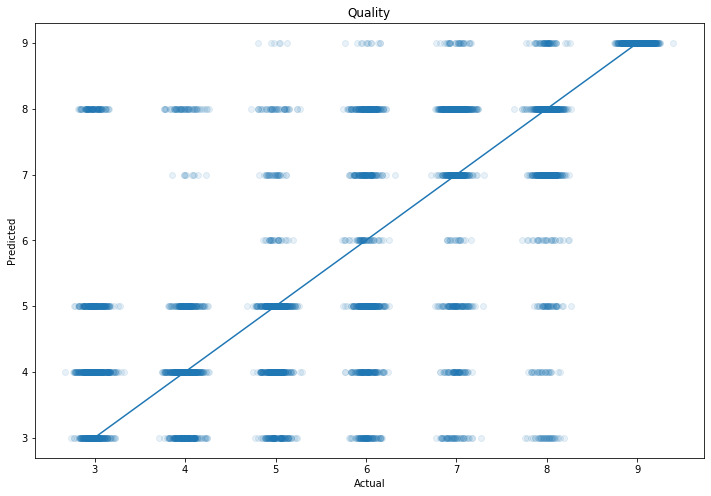

In [15]:
from sklearn.svm import LinearSVC

check_out_model(LinearSVC())

              precision    recall  f1-score   support

           3       0.83      0.11      0.19       709
           4       0.48      0.39      0.43       709
           5       0.25      0.62      0.35       709
           6       0.31      0.42      0.35       709
           7       0.41      0.60      0.49       709
           8       0.68      0.48      0.56       709
           9       0.00      0.00      0.00       709

    accuracy                           0.37      4963
   macro avg       0.42      0.37      0.34      4963
weighted avg       0.42      0.37      0.34      4963



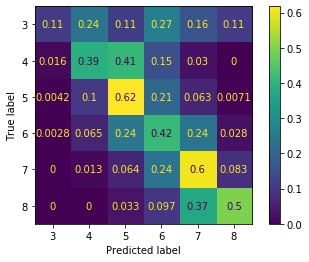

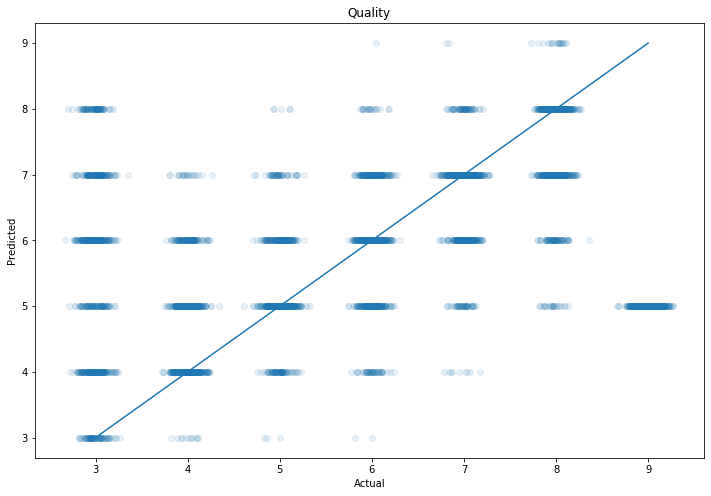

KNeighborsClassifier()

In [89]:
from sklearn.neighbors import KNeighborsClassifier

check_out_model(KNeighborsClassifier(n_neighbors=5))
kneighbors = KNeighborsClassifier(n_neighbors=5)
kneighbors.fit(Xtrain,ytrain)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00       709
           4       0.59      0.28      0.38       709
           5       0.36      0.69      0.48       709
           6       0.32      0.67      0.44       709
           7       0.29      0.63      0.40       709
           8       0.91      0.34      0.50       709
           9       0.00      0.00      0.00       709

    accuracy                           0.37      4963
   macro avg       0.36      0.37      0.31      4963
weighted avg       0.36      0.37      0.31      4963



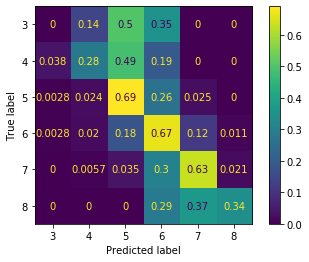

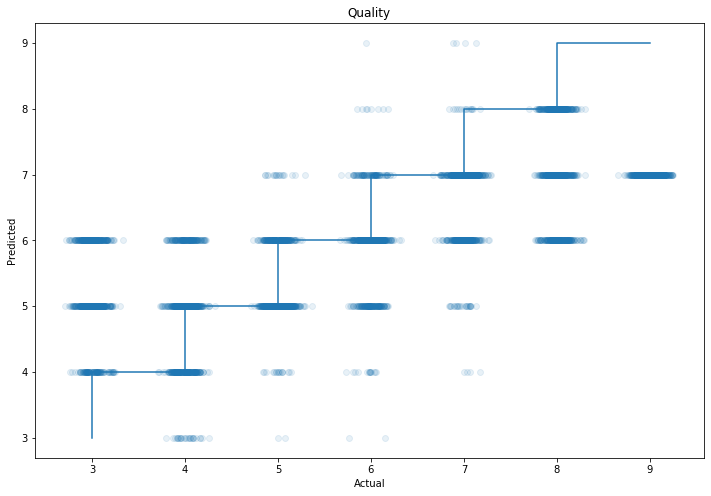

In [26]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(DecisionTreeClassifier(),n_estimators=40)
check_out_model(bag)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00       709
           4       0.43      0.36      0.39       709
           5       0.35      0.60      0.44       709
           6       0.17      0.38      0.23       709
           7       0.42      0.63      0.51       709
           8       0.74      0.51      0.61       709
           9       0.00      0.00      0.00       709

    accuracy                           0.35      4963
   macro avg       0.30      0.35      0.31      4963
weighted avg       0.30      0.35      0.31      4963



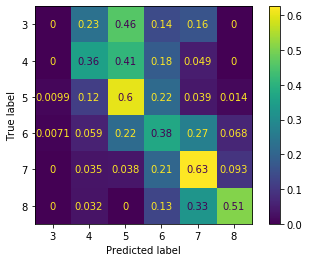

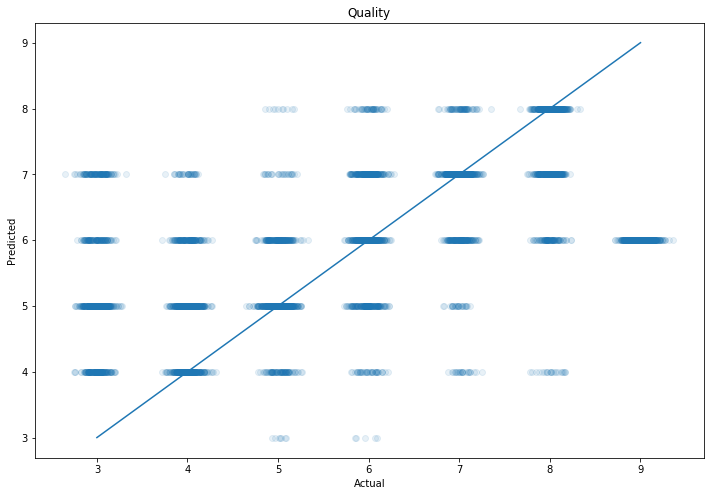

GradientBoostingClassifier()

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

check_out_model(GradientBoostingClassifier())
gradientBoost = GradientBoostingClassifier()
gradientBoost.fit(Xtrain,ytrain)

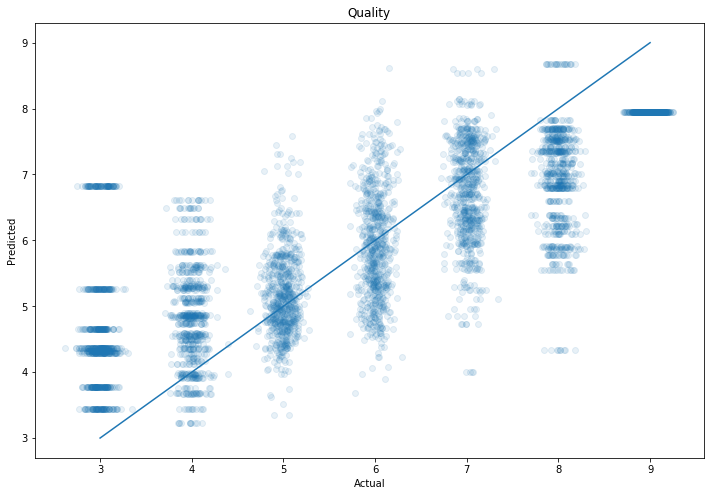

In [32]:
def check_out_regression(model):
    model.fit(X_resampled,y_resampled)
    y_pred = model.predict(Xtest)
    #print(classification_report(ytest,y_pred))
    #plot_confusion_matrix(model,Xtest,ytest,labels=[3,4,5,6,7,8],normalize='true')
    plt.show()
    class_scatter(ytest,y_pred)
    
from sklearn.ensemble import GradientBoostingRegressor

check_out_regression(GradientBoostingRegressor())

i =  3


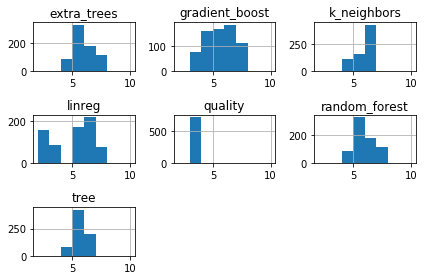

i =  4


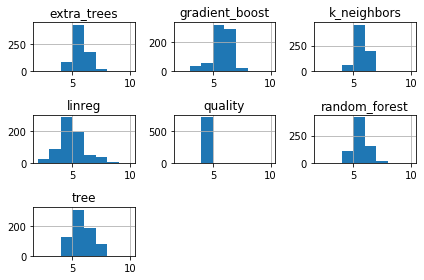

i =  5


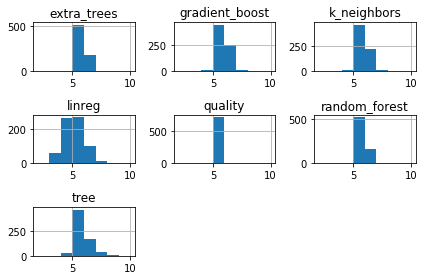

i =  6


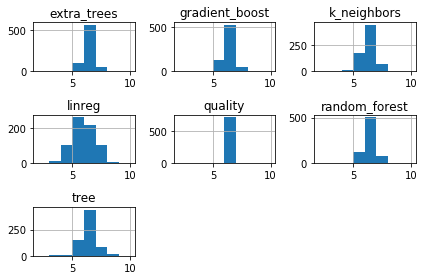

i =  7


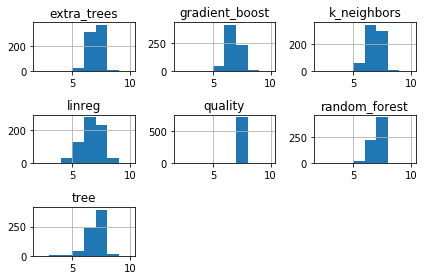

i =  8


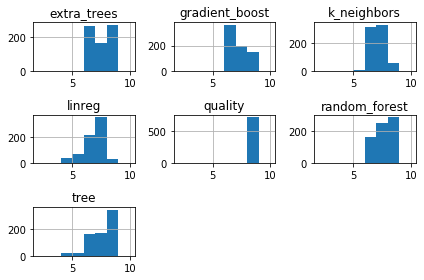

i =  9


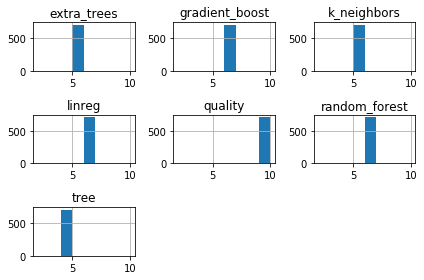

In [90]:
comparison = pd.DataFrame(ytest.transpose())
comparison['linreg'] = model1.predict(Xtest)
comparison['tree'] = tree.predict(Xtest)
comparison['random_forest'] = randomForest.predict(Xtest)
comparison['extra_trees'] = extraTrees.predict(Xtest)
comparison['gradient_boost'] = gradientBoost.predict(Xtest)
comparison['k_neighbors'] = kneighbors.predict(Xtest)

for i in range(3,10):
    print("i = ", i)
    comparison[comparison['quality'] == i].hist(bins=[2,3,4,5,6,7,8,9,10])
    plt.tight_layout()
    plt.show()

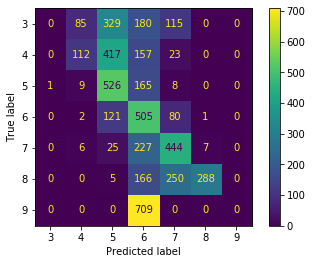

In [83]:
plot_confusion_matrix(randomForest,Xtest,ytest)

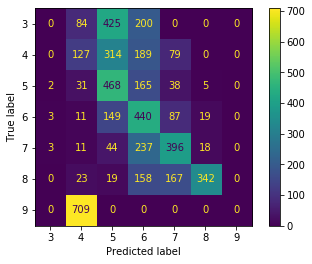

In [80]:
plot_confusion_matrix(tree,Xtest,ytest)

In [96]:
comparison[comparison['quality'] == 3].sample(20)

,quality,linreg,tree,random_forest,extra_trees,gradient_boost,k_neighbors
1916,3,6.666967,6,7,7,7,4
2076,3,2.995617,5,5,5,5,5
1883,3,6.630248,5,6,6,6,6
2038,3,7.527015,5,6,6,4,6
1936,3,2.633777,5,5,5,3,5
2152,3,2.995617,5,5,5,5,5
2256,3,5.053456,4,5,5,4,6
2275,3,5.086959,6,4,4,6,6
1834,3,6.630248,5,6,6,6,6
1903,3,6.666967,6,7,7,7,4


In [101]:
from sklearn.metrics import mean_squared_error

print('tree', mean_squared_error(ytest,tree.predict(Xtest)))
print('random_forest', mean_squared_error(ytest,randomForest.predict(Xtest)))
print('extra_trees',mean_squared_error(ytest,extraTrees.predict(Xtest)))
print('gradient_boost',mean_squared_error(ytest,gradientBoost.predict(Xtest)))
print('k_neighbors',mean_squared_error(ytest,kneighbors.predict(Xtest)))
print('linear_regression',mean_squared_error(ytest,model1.predict(Xtest)))

tree 5.196453757807777
random_forest 2.8740681039693734
extra_trees 3.9403586540398954
gradient_boost 3.0588353818255087
k_neighbors 4.05460407011888
linear_regression 3.286348263319027


In [102]:
from sklearn.ensemble import RandomForestRegressor

randomForestRegressor = RandomForestRegressor()
randomForestRegressor.fit(Xtrain,ytrain)
print('random_forest_regressor',mean_squared_error(ytest,randomForestRegressor.predict(Xtest)))

random_forest_regressor 3.264862079387467


In [105]:
from sklearn.metrics import explained_variance_score

print('tree',explained_variance_score(ytest,tree.predict(Xtest)))
print('random_forest', explained_variance_score(ytest,randomForest.predict(Xtest)))
print('extra_trees',explained_variance_score(ytest,extraTrees.predict(Xtest)))
print('gradient_boost',explained_variance_score(ytest,gradientBoost.predict(Xtest)))
print('k_neighbors',explained_variance_score(ytest,kneighbors.predict(Xtest)))
print('linear_regression',explained_variance_score(ytest,model1.predict(Xtest)))

tree -0.2624731698834928
random_forest 0.2826701187416746
extra_trees 0.02894707151681264
gradient_boost 0.24454789743923688
k_neighbors 0.011590464175986193
linear_regression 0.18573405251519803


In [107]:
from sklearn.metrics import mean_absolute_error

print('tree',mean_absolute_error(ytest,tree.predict(Xtest)))
print('random_forest', mean_absolute_error(ytest,randomForest.predict(Xtest)))
print('extra_trees', mean_absolute_error(ytest,extraTrees.predict(Xtest)))
print('gradient_boost',mean_absolute_error(ytest,gradientBoost.predict(Xtest)))
print('k_neighbors',mean_absolute_error(ytest,kneighbors.predict(Xtest)))
print('linear_regression',mean_absolute_error(ytest,model1.predict(Xtest)))

tree 1.536167640539996
random_forest 1.2024984888172476
extra_trees 1.378198670159178
gradient_boost 1.315937940761636
k_neighbors 1.4948619786419504
linear_regression 1.3910440370915653


In [117]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import BaggingClassifier

clf1 = BaggingClassifier(ExtraTreeClassifier())
clf1.fit(Xtrain,ytrain)
print('BaggingExtraTreeClassifier',mean_squared_error(ytest,clf1.predict(Xtest)))

BaggingExtraTreeClassifier 2.6770098730606486


In [112]:
clf1.get_params()

{'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': 'auto',
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'random',
 'base_estimator': ExtraTreeClassifier(),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [123]:
comparison['bag_extra_trees'] = clf1.predict(Xtest)

In [124]:
comparison.sample(10)

,quality,linreg,tree,random_forest,extra_trees,gradient_boost,k_neighbors,bag_extra_trees
3958,8,7.233907,7,7,6,6,7,7
3242,7,7.033243,4,6,6,6,6,7
3702,8,6.748280,6,6,6,6,6,6
38,5,5.121171,5,5,5,5,6,5
297,5,5.175591,5,5,5,5,6,5
4616,9,6.060651,4,6,5,6,5,6
2494,4,4.699492,5,5,5,5,5,6
851,5,5.051904,6,6,6,6,6,6
4715,9,6.060651,4,6,5,6,5,6
1577,6,5.247946,6,6,6,6,6,6


In [125]:
comparison[comparison['quality'] != comparison['bag_extra_trees']].sample(10)

,quality,linreg,tree,random_forest,extra_trees,gradient_boost,k_neighbors,bag_extra_trees
4182,8,7.798426,7,7,6,7,7,7
4818,9,6.060651,4,6,5,6,5,6
1695,3,5.086959,6,4,4,6,6,4
2061,3,6.666967,6,7,7,7,4,6
2572,4,4.249589,4,4,4,6,4,6
4824,9,6.060651,4,6,5,6,5,6
4536,9,6.060651,4,6,5,6,5,6
4629,9,6.060651,4,6,5,6,5,6
3938,8,6.493100,6,7,7,7,7,7
2292,3,6.666967,6,7,7,7,4,6


In [122]:
clf2 = BaggingClassifier(ExtraTreeClassifier(),n_estimators=100)
clf2.fit(Xtrain,ytrain)
print('BaggingExtraTreeClassifier',mean_squared_error(ytest,clf2.predict(Xtest)))

BaggingExtraTreeClassifier 3.8537175095708243
